In [4]:
import build
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import warnings
import keras
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [6]:
np.set_printoptions(threshold=np.nan)

In [7]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

In [8]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
directory = '../dataset/price_long_50'
filenames = os.listdir(directory)
print(filenames)

all_data = np.zeros((len(filenames),2518),dtype = np.float32)
for i in range(len(filenames)):
    filename = filenames[i]
    #print(i)
    #print(filename)
  
    data=pd.read_csv(directory+'/'+filename)
    vars = ['Open']
    data = data[vars]
    data = np.array(data)
    data = np.transpose(data)
    data = data[0]
    data = data[::-1]
  
    all_data[i] = data
all_data=all_data.T
print(all_data.shape)  
#np.save('data',all_data)
scaler = MinMaxScaler(feature_range=(0, 1))
data50=scaler.fit_transform(all_data)

['AAPL.csv', 'AMZN.csv', 'BA.csv', 'BAC.csv', 'BHP.csv', 'BRK-B.csv', 'CHL.csv', 'CMCSA.csv', 'CVX.csv', 'D.csv', 'DCM.csv', 'DIS.csv', 'DOW.csv', 'DUK.csv', 'EXC.csv', 'GE.csv', 'GOOGL.csv', 'HD.csv', 'INTC.csv', 'JNJ.csv', 'JPM.csv', 'KO.csv', 'MA.csv', 'MMM.csv', 'MO.csv', 'MRK.csv', 'MSFT.csv', 'NGG.csv', 'NTT.csv', 'NVS.csv', 'ORCL.csv', 'PEP.csv', 'PFE.csv', 'PG.csv', 'PTR.csv', 'RDS-B.csv', 'RIO.csv', 'SO.csv', 'SPY.csv', 'SYT.csv', 'T.csv', 'TM.csv', 'TOT.csv', 'UNH.csv', 'UPS.csv', 'VALE.csv', 'VZ.csv', 'WFC.csv', 'WMT.csv', 'XOM.csv']
(2518, 50)


In [9]:
data50.shape

(2518, 50)

In [11]:
def load_data(filename, step):
    #load data from the data file
    day = step
    data = np.array(filename).T
    print data.shape
    data = data[:, :]
    gt_test = data[:,day:]
    #data normalization
    max_data = np.max(data, axis = 1)
    min_data = np.min(data, axis = 1)
    max_data = np.reshape(max_data, (max_data.shape[0],1))
    min_data = np.reshape(min_data, (min_data.shape[0],1))
    data = (2 * data - (max_data + min_data)) / (max_data - min_data)
    #dataset split
    train_split = int(round(0.8 * data.shape[1]))
    val_split = int(round(0.9 * data.shape[1]))
    x_train=[]
    for i in range(step):
        tmp=data[:,day:day+train_split].T
        x_train.append( np.reshape(tmp,(tmp.shape[0],1,tmp.shape[1])) )
    x_train=np.concatenate(x_train,axis=1)
    y_train = data[:,day:train_split+day].T
    
    x_test=[]
    for i in range(step):
        tmp=data[:,day+train_split:day+val_split].T
        x_test.append( np.reshape(tmp,(tmp.shape[0],1,tmp.shape[1])) )
    x_test=np.concatenate(x_test,axis=1)
    y_test = data[:,day+train_split:day+val_split].T
    
    

    return [x_train, y_train, x_test, y_test, gt_test, max_data, min_data]

In [12]:
step=7
X_train, y_train, X_test, y_test, gt_test, max_data, min_data = load_data(data50, step)

(50, 2518)


In [13]:
print X_train.shape,y_train.shape

(2014, 7, 50) (2014, 50)


In [14]:
# a=np.ones((14,1,5))
# b=np.ones((14,1,5))*2
# c=np.ones((14,1,5))*3
# np.concatenate([a,b,c],axis=1)[0]

In [15]:
#X_train=np.random.random((2014,7,50))
#y_train=np.random.random((2014,50))

In [16]:
def LSTM50(timestep=7,input_n_stock=50,outputdim=50):
    model = Sequential()
    # model.add(LSTM(units=4,input_shape=(input_dim,step)))
    model.add(LSTM(
            outputdim,input_dim=input_n_stock,input_length=timestep,stateful=False,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(
            outputdim,stateful=False,return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(outputdim,kernel_initializer="uniform",activation='relu')) 
    model.add(Dense(outputdim))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [17]:
step=7;input_n_stock=50;outputdim=50
model=LSTM50(step,input_n_stock,outputdim)
model.fit(X_train,
          y_train,
          batch_size=60,
          validation_split=0.1,
          epochs=100)

Train on 1812 samples, validate on 202 samples
Epoch 1/100
1812/1812 [==============================] - 0s 221us/step - loss: 0.1815 - val_loss: 0.2210
Epoch 2/100
1812/1812 [==============================] - 0s 199us/step - loss: 0.0684 - val_loss: 0.1046
Epoch 3/100
1812/1812 [==============================] - 1s 300us/step - loss: 0.0306 - val_loss: 0.0738
Epoch 4/100
1812/1812 [==============================] - 1s 314us/step - loss: 0.0218 - val_loss: 0.0691
Epoch 5/100
1812/1812 [==============================] - 0s 253us/step - loss: 0.0182 - val_loss: 0.0657
Epoch 6/100
1812/1812 [==============================] - 0s 207us/step - loss: 0.0155 - val_loss: 0.0648
Epoch 7/100
1812/1812 [==============================] - 0s 246us/step - loss: 0.0142 - val_loss: 0.0640
Epoch 8/100
1812/1812 [==============================] - 0s 240us/step - loss: 0.0131 - val_loss: 0.0619
Epoch 9/100
1812/1812 [==============================] - 0s 214us/step - loss: 0.0120 - val_loss: 0.0616
Epoch 10

Epoch 78/100
1812/1812 [==============================] - 0s 211us/step - loss: 0.0043 - val_loss: 0.0412
Epoch 79/100
1812/1812 [==============================] - 0s 214us/step - loss: 0.0042 - val_loss: 0.0435
Epoch 80/100
1812/1812 [==============================] - 0s 229us/step - loss: 0.0042 - val_loss: 0.0430
Epoch 81/100
1812/1812 [==============================] - 0s 222us/step - loss: 0.0042 - val_loss: 0.0407
Epoch 82/100
1812/1812 [==============================] - 0s 223us/step - loss: 0.0041 - val_loss: 0.0400
Epoch 83/100
1812/1812 [==============================] - 1s 284us/step - loss: 0.0041 - val_loss: 0.0401
Epoch 84/100
1812/1812 [==============================] - 0s 218us/step - loss: 0.0041 - val_loss: 0.0412
Epoch 85/100
1812/1812 [==============================] - 0s 212us/step - loss: 0.0040 - val_loss: 0.0394
Epoch 86/100
1812/1812 [==============================] - 0s 197us/step - loss: 0.0040 - val_loss: 0.0412
Epoch 87/100
1812/1812 [======================

In [19]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform(y_test)

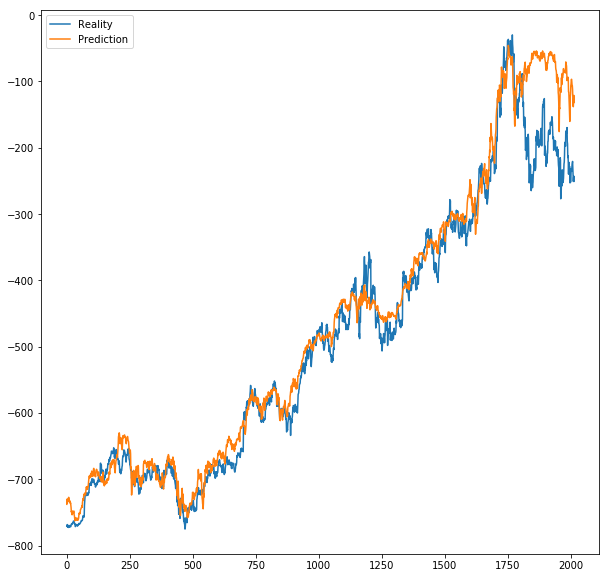

In [21]:
plt.figure(figsize=(10,10)) 
l1,=plt.plot(y_train[:,1])
l2,=plt.plot(trainPredict[:,1])
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()

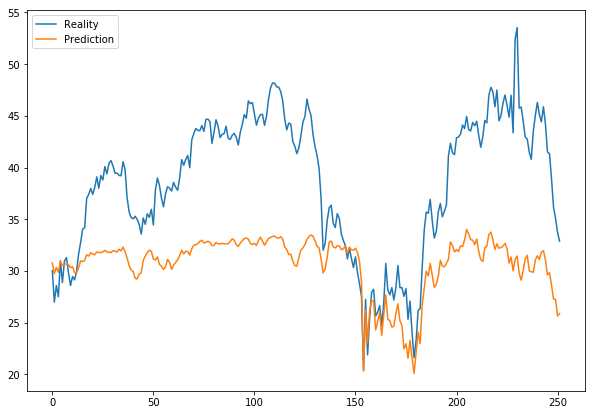

In [22]:

plt.figure(figsize=(10,7)) 
n=12
l1,=plt.plot(y_test[:,n])
l2,=plt.plot(testPredict[:,n])
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()